# **Regression**

In [1]:
import numpy as np

In [2]:

X = 2*np.random.rand(100,1)
y= 4 +3*X+np.random.randn(100,1)

In [3]:
X_b = np.c_[np.ones((100,1)),X]

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.95288047],
       [3.10039745]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.95288047],
       [10.15367537]])

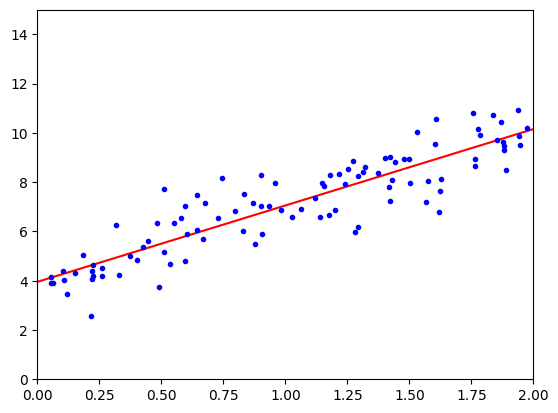

In [6]:
import matplotlib.pyplot as plt
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

# **SKLEARN**

In [7]:

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([3.95288047]), array([[3.10039745]]))

In [8]:
lin_reg.predict(X_new)

array([[ 3.95288047],
       [10.15367537]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[3.95288047],
       [3.10039745]])

# **GRADIENT DESCENT**

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.95288047],
       [3.10039745]])

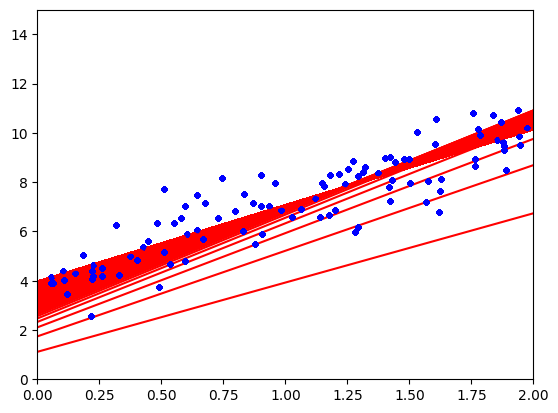

In [11]:
eta = 0.1
n_iterations = 1000
m = 100


theta = np.random.randn(2,1)
for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - eta * gradients
  X_new = np.array([[0],[2]])
  X_new_b = np.c_[np.ones((2,1)),X_new]
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new,y_predict,"r-")
  plt.plot(X,y,"b.")
  plt.axis([0,2,0,15])
plt.show()

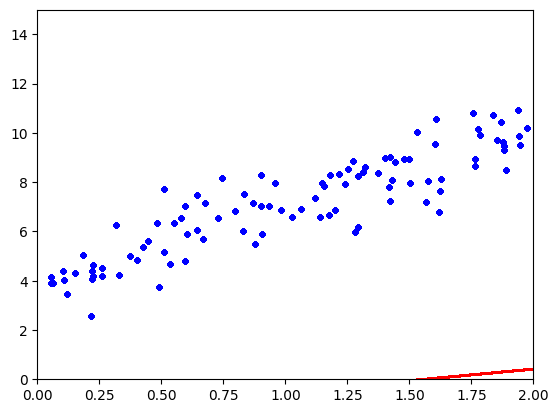

In [12]:
n_epochs =50
t0,t1 = 5,50

def learning_schedule(t):
  return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gardients = 2 * xi.T.dot(xi.dot(theta)-yi)
    eta=learning_schedule(epoch*m+i)
    theta = theta - eta * gradients
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)),X_new]
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new,y_predict,"r-")
    plt.plot(X,y,"b.")
    plt.axis([0,2,0,15])
plt.show()

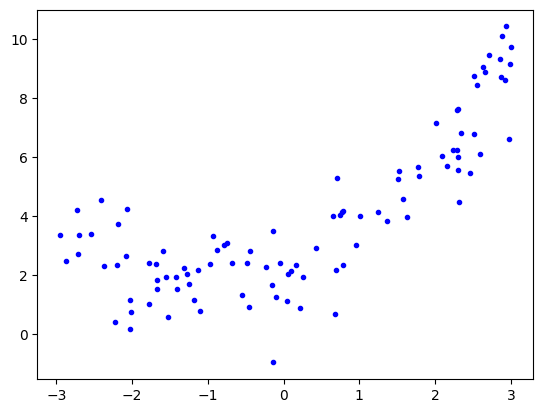

In [14]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 *X**2 + X + 2 +np.random.randn(m,1)
plt.plot(X,y,"b.")